1. Reading images to OpenCV
2. Detecting number plates using Edge Detection
3. Extracting number plate text using OCR

In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 15 kB/s 
     |████████████████████████████████| 47.6 MB 12.9 MB/s 


In [ ]:
import io
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

### 1. Read in Image and Grayscale

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cars109.png to Cars109 (2).png


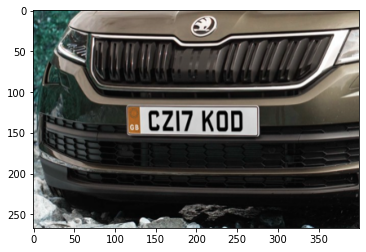

In [ ]:
img = cv2.imread('Cars109.png')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.imshow(img)

### 2. Apply filter and find edges for localization

Filtering is used to remove noise from image and edge detection will be able to detect edges from image 

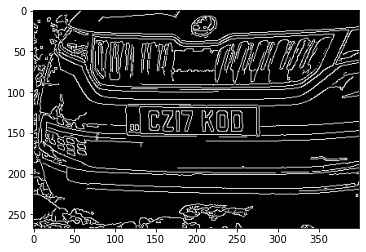

In [ ]:
bfilter = cv2.bilateralFilter(gray,11,17,17) # Noise reduction
# numbers in bfilter indicates how intensiley we want noise reduction to happen
edged = cv2.Canny(bfilter,30,200) # Edge Detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

### 3. Find Contours and Apply Mask

In [ ]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(cnts)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

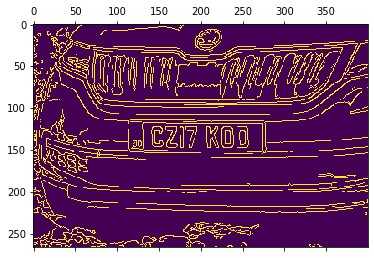

In [ ]:
plt.matshow(edged)

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [ ]:
location

array([[[130, 120]],

       [[273, 119]],

       [[274, 152]],

       [[133, 151]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location],0,255,-1)
new_image = cv2.bitwise_and(img, img, mask=mask)

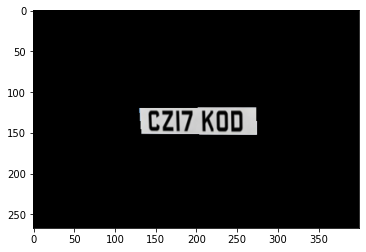

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) =(np.max(x),np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
# +1 is used to give little bit of buffer

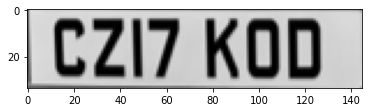

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

### 4. Use Easy OCR To Read Text


In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[7, 1], [133, 1], [133, 34], [7, 34]], 'Czi7 kod', 0.48716398565487495)]

### 5. Render Result

In [ ]:
result

[([[7, 1], [133, 1], [133, 34], [7, 34]], 'Czi7 kod', 0.48716398565487495)]

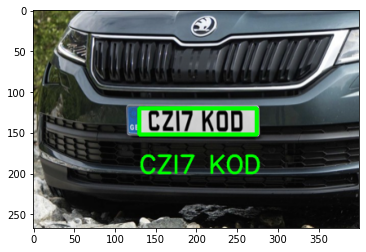

In [ ]:
text = result[0][-2]
text = text.upper()
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+80), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))